In [1]:
import tensorflow as tf # tensorflow 2.10
import numpy as np
import matplotlib.pyplot as plt
from load_data2 import evals_parser, evals_square_parser, evecs_parser

2022-10-19 10:28:59.145228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 10:28:59.405898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 10:28:59.405924: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-19 10:28:59.444459: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-19 10:29:00.500166: W tensorflow/stream_executor/platform/de

In [2]:
# Importing the datasets
batch_size = 16
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

evals_dataset = dataset.map(evals_parser)
evals_dataset = evals_dataset.shuffle(buffer_size=10).batch(batch_size)

evals_square_dataset = dataset.map(evals_square_parser)
evals_square_dataset = evals_square_dataset.shuffle(buffer_size=10).batch(batch_size)

evecs_dataset = dataset.map(evecs_parser)
evecs_dataset = evecs_dataset.shuffle(buffer_size=10).batch(batch_size)

2022-10-19 10:29:02.710532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 10:29:02.711087: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 10:29:02.711142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-10-19 10:29:02.720774: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### WGANGP to generate eigenvalues

In [3]:
from evals_WGANGP2 import evals_WGANGP

# Creating GAN
evals_wgangp = evals_WGANGP()

-=-=- EPOCH 1 -=-=-
>loss: [c=4.123][g=-0.124]
>accuracy: [c=0.500][g=0.438]

-=-=- EPOCH 2 -=-=-
>loss: [c=1.720][g=0.269]
>accuracy: [c=0.500][g=0.625]

-=-=- EPOCH 3 -=-=-
>loss: [c=0.080][g=0.946]
>accuracy: [c=0.500][g=0.750]

-=-=- EPOCH 4 -=-=-
>loss: [c=0.341][g=1.089]
>accuracy: [c=0.500][g=0.812]

-=-=- EPOCH 5 -=-=-
>loss: [c=-2.437][g=1.619]
>accuracy: [c=0.500][g=0.875]

-=-=- EPOCH 6 -=-=-
>loss: [c=10.659][g=1.074]
>accuracy: [c=0.500][g=0.875]

-=-=- EPOCH 7 -=-=-
>loss: [c=-2.656][g=1.352]
>accuracy: [c=0.500][g=0.812]

-=-=- EPOCH 8 -=-=-
>loss: [c=-3.982][g=1.324]
>accuracy: [c=0.500][g=0.812]

-=-=- EPOCH 9 -=-=-
>loss: [c=-0.472][g=1.867]
>accuracy: [c=0.500][g=0.750]

-=-=- EPOCH 10 -=-=-
>loss: [c=-4.011][g=1.751]
>accuracy: [c=0.500][g=0.875]



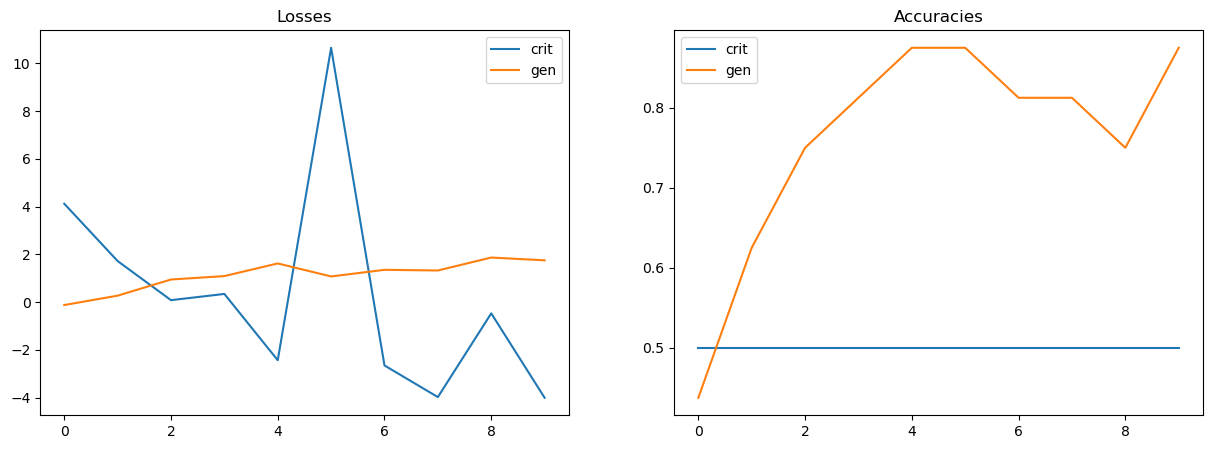

In [4]:
evals_wgangp.train(evals_dataset=evals_square_dataset, n_epoch=10)

1/1 [==============================] - 0s 196ms/step
tf.Tensor(-2.411271, shape=(), dtype=float32)
1/1 [==============================] - 0s 29ms/step
tf.Tensor(-1.6413991, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-4.235903, shape=(), dtype=float32)
1/1 [==============================] - 0s 35ms/step
tf.Tensor(-4.278419, shape=(), dtype=float32)
1/1 [==============================] - 0s 49ms/step
tf.Tensor(-5.3864856, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-2.0784545, shape=(), dtype=float32)
1/1 [==============================] - 0s 28ms/step
tf.Tensor(-6.1186404, shape=(), dtype=float32)
1/1 [==============================] - 0s 22ms/step
tf.Tensor(-4.188416, shape=(), dtype=float32)
1/1 [==============================] - 0s 20ms/step
tf.Tensor(-3.2321365, shape=(), dtype=float32)
1/1 [==============================] - 0s 32ms/step
tf.Tensor(-2.7282004, shape=(), dtype=float32)
1/1 [========

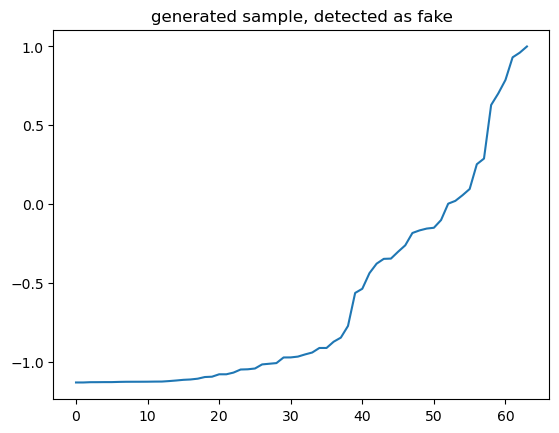

In [5]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evals_wgangp.generate_evals()
sample = np.sort(np.array(sample[0, :, :, 0]).flatten()) # convert sample from (1,8,8,1) to (64,)


if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(sample)
else:
    plt.title("generated sample, detected as fake")
    plt.plot(sample)    

### WGANGP to generate eigenvectors

In [6]:
from evecs_WGANGP2 import evecs_WGANGP

# Creating GAN
evecs_wgangp = evecs_WGANGP()

-=-=- EPOCH 1 -=-=-
>loss: [c=107.646][g=-1.111]
>accuracy: [c=0.500][g=0.062]

-=-=- EPOCH 2 -=-=-
>loss: [c=93.981][g=-1.218]
>accuracy: [c=0.500][g=0.062]

-=-=- EPOCH 3 -=-=-
>loss: [c=76.458][g=-1.052]
>accuracy: [c=0.500][g=0.188]



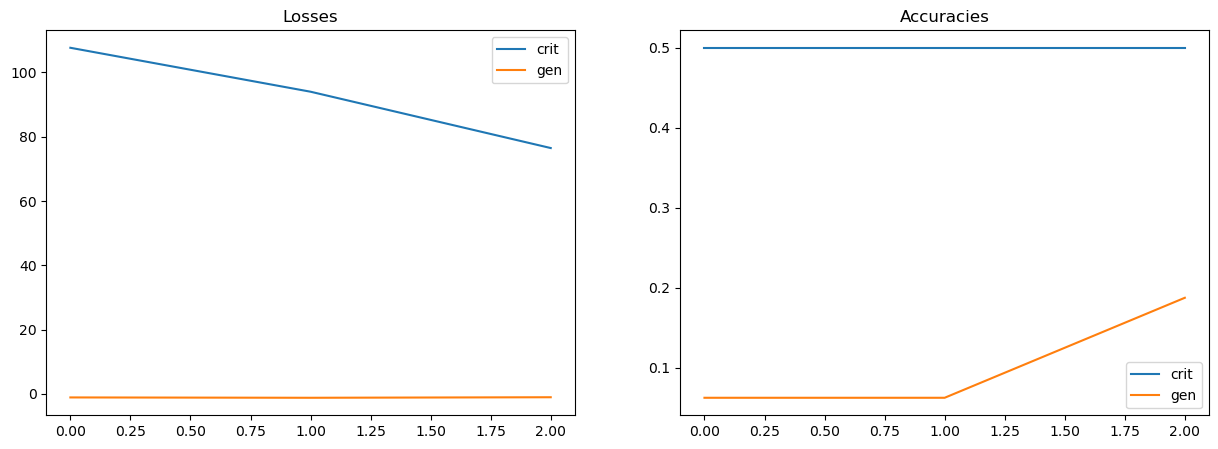

In [7]:
evecs_wgangp.train(evecs_dataset=evecs_dataset, n_epoch=3)

1/1 [==============================] - 0s 49ms/step
real eigenvalues found
(1, 64, 64, 2)


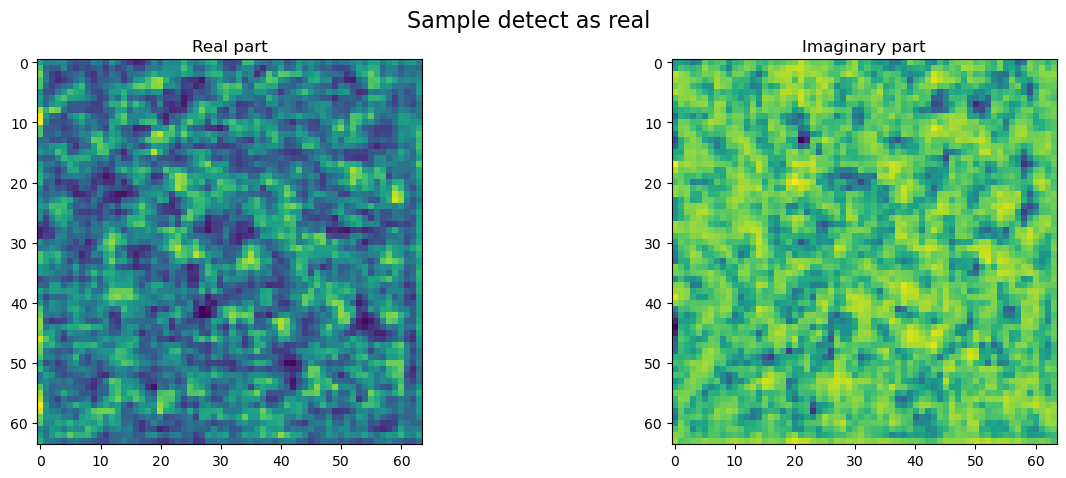

In [8]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evecs_wgangp.generate_evecs()
print(sample.shape)

sample_real = sample[0, :, :, 0] # get real part from sample
sample_imag = sample[0, :, :, 1] # get imaginary part from sample

if is_real:

    fig = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title("Real part")
    plt.imshow(sample_real)

    plt.subplot(1,2,2)
    plt.title("Imaginary part")
    plt.imshow(sample_imag)

    fig.suptitle('Sample detect as real', fontsize=16)

    
else:
    fig = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.title("Real part")
    plt.imshow(sample_real)

    plt.subplot(1,2,2)
    plt.title("Imaginary part")
    plt.imshow(sample_imag)

    fig.suptitle('Sample detect as fake', fontsize=16)


### Check validity of obtained data

- Use both WGAN-GPs to generate eigenvalues and eigenvectors
- Use the eigendecomposition formula to recreate (scaled) CSM
- Use obtained CSM to perform beamforming

In [10]:
from beamforming import beamform, get_csm

evals_are_real, generated_evals = evals_wgangp.generate_evals()
evecs_are_real, generated_evecs = evecs_wgangp.generate_evecs()

#if evals_are_real and evecs_are_real:
    
# reshape data
evals_vec_numpy = np.sort(np.array(generated_evals[0, :, :, 0]).flatten())
evals_vec = tf.convert_to_tensor(evals_vec_numpy)
evecs_real = generated_evecs[0, :, :, 0] # get real part from sample
evecs_imag = generated_evecs[0, :, :, 1] # get imaginary part from sample

csm = get_csm(evecs_real, evecs_imag, evals_vec)

beamform(csm.numpy())



1/1 [==============================] - 0s 119ms/step
tf.Tensor(-4.8745823, shape=(), dtype=float32)
1/1 [==============================] - 0s 264ms/step
tf.Tensor(-3.3199716, shape=(), dtype=float32)
1/1 [==============================] - 0s 233ms/step
tf.Tensor(-4.317132, shape=(), dtype=float32)
1/1 [==============================] - 0s 145ms/step
tf.Tensor(-6.1960816, shape=(), dtype=float32)
1/1 [==============================] - 0s 117ms/step
tf.Tensor(-2.1310441, shape=(), dtype=float32)
1/1 [==============================] - 0s 139ms/step
tf.Tensor(-2.8059003, shape=(), dtype=float32)
1/1 [==============================] - 0s 104ms/step
tf.Tensor(-3.48783, shape=(), dtype=float32)
1/1 [==============================] - 0s 180ms/step
tf.Tensor(-4.714385, shape=(), dtype=float32)
1/1 [==============================] - 0s 148ms/step
tf.Tensor(-2.5467234, shape=(), dtype=float32)
1/1 [==============================] - 0s 205ms/step
tf.Tensor(-1.3073589, shape=(), dtype=float32)
1/1 

Exception occurred in traits notification handler for object: <acoular.microphones.MicGeom object at 0x7f28816631a0>, trait: basename, old value: None, new value: tub_vogel64_ap1
Traceback (most recent call last):
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/traits/trait_notifiers.py", line 524, in _dispatch_change_event
    self.dispatch(handler, *args)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/traits/trait_notifiers.py", line 486, in dispatch
    handler(*args)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/site-packages/acoular/microphones.py", line 117, in import_mpos
    doc = xml.dom.minidom.parse(self.from_file)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/xml/dom/minidom.py", line 1988, in parse
    return expatbuilder.parse(file)
  File "/home/gaspard/anaconda3/envs/master_arbeit/lib/python3.10/xml/dom/expatbuilder.py", line 910, in parse
    with open(file, 'rb') a

no real eigenvalues found
(1, 64, 64)


TraitError: The '_csm' trait of a PowerSpectraImport instance must be an array, but a value of <tf.Tensor: shape=(1, 64, 64), dtype=complex64, numpy=
array([[[-0.50507563+7.4505806e-09j, -0.5345436 +8.9264020e-02j,
         -0.47163987+8.0377541e-02j, ..., -0.39294943+2.9566452e-01j,
         -0.43204534+9.3690693e-02j, -0.5666629 +1.8660724e-01j],
        [-0.5345436 -8.9264020e-02j, -0.71773475-5.5879354e-09j,
         -0.6672008 -2.0570632e-02j, ..., -0.5326932 +2.9034033e-01j,
         -0.54237604+1.3847449e-02j, -0.7196916 +1.0065204e-01j],
        [-0.47163987-8.0377541e-02j, -0.6672008 +2.0570640e-02j,
         -0.71982706+7.4505806e-09j, ..., -0.44243905+2.7006391e-01j,
         -0.4740675 +1.6732061e-02j, -0.6427876 +1.0307970e-01j],
        ...,
        [-0.39294943-2.9566455e-01j, -0.5326932 -2.9034033e-01j,
         -0.44243905-2.7006391e-01j, ..., -0.76915884-2.9802322e-08j,
         -0.5607907 -2.2778672e-01j, -0.74131364-2.2782153e-01j],
        [-0.43204534-9.3690686e-02j, -0.54237604-1.3847446e-02j,
         -0.47406745-1.6732069e-02j, ..., -0.5607907 +2.2778669e-01j,
         -0.60813296+3.7252903e-09j, -0.70999354+1.0361715e-01j],
        [-0.56666285-1.8660724e-01j, -0.7196916 -1.0065204e-01j,
         -0.6427876 -1.0307970e-01j, ..., -0.74131364+2.2782157e-01j,
         -0.70999354-1.0361715e-01j, -0.9719369 +0.0000000e+00j]]],
      dtype=complex64)> <class 'tensorflow.python.framework.ops.EagerTensor'> was specified.